In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("solar_system.csv")

In [3]:
df.shape

(20, 11)

In [4]:
#4b) There are 20 rows and 11 columns
df.head()

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3


In [5]:
df.tail()

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
15,Mean Temperature (C),167,464,15,-20,-65,-110,-140,-195,-200,-225
16,Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
17,Number of Moons,0,0,1,0,2,95,274,28,16,5
18,Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
19,Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown


In [6]:
df.columns

Index(['Attribute', 'Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [7]:
print(df["Attribute"])

0                  Mass (10^24kg)
1                   Diameter (km)
2                Density (kg/m^3)
3                 Gravity (m/s^2)
4          Escape Velocity (km/s)
5         Rotation Period (hours)
6           Length of Day (hours)
7     Distance from Sun (10^6 km)
8            Perihelion (10^6 km)
9              Aphelion (10^6 km)
10          Orbital Period (days)
11        Orbital Velocity (km/s)
12      Orbital Inclination (deg)
13           Orbital Eccentricity
14       Obliquity to Orbit (deg)
15           Mean Temperature (C)
16        Surface Pressure (bars)
17                Number of Moons
18                   Ring System?
19         Global Magnetic Field?
Name: Attribute, dtype: object


In [8]:
orbital_periods = []
perihelions = []
aphelions = []
for column in df.columns:
    if column == "Attribute":
        continue
    orbital_periods.append(float(df[column][10]))
for column in df.columns:
    if column == "Attribute":
        continue
    perihelions.append(float(df[column][8]))
for column in df.columns:
    if column == "Attribute":
        continue
    aphelions.append(float(df[column][9]))
print(perihelions)

[46.0, 107.5, 147.1, 0.363, 206.7, 740.6, 1357.6, 2732.7, 4471.1, 4436.8]


In [127]:
#6) Perihelion is the point of orbit closest to the sun, Aphelion is the point of orbit farthest from the sun, 
#6) The closest point in orbit is the perihelion, and the furthest point is rh
# and semi-major axis is the semi-major axis of the ellipse that the orbital path of the object forms.

In [9]:
semi_major_list = []
for item1, item2 in zip(perihelions, aphelions):
    semi_major_list.append((item1 + item2)/2)
semi_major_data = list(semi_major_list)
semi_major_list.insert(0, "Semi-major axis (10^6 km)")
df.loc[len(df)] = semi_major_list

In [10]:
df.shape

(21, 11)

In [130]:
#9) There are 21 rows and 11 columns

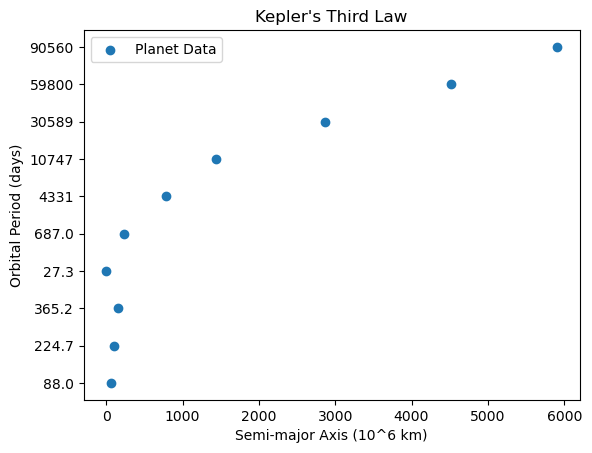

In [11]:
orbital_period_data = list(df.loc[10, :])
orbital_period_data.pop(0)
plt.scatter(x=semi_major_data, y=orbital_period_data, label = "Planet Data")
plt.title("Kepler's Third Law")
plt.xlabel("Semi-major Axis (10^6 km)")
plt.ylabel("Orbital Period (days)")
plt.legend()
plt.show()

In [12]:
semi_major_data = np.asarray(semi_major_data, dtype=float)
orbital_period_data = np.asarray(orbital_period_data, dtype=float)
def keplers_third_law(a, m):
    return m * a**1.5
p0 = [1]
popt, pcov = curve_fit(keplers_third_law, semi_major_data, orbital_period_data, p0=p0)
m_fit = popt[0]
residuals = orbital_period_data - keplers_third_law(semi_major_data, m_fit)
chi2 = np.sum(residuals**2)
dof = len(semi_major_data) - len(popt)
chi2_reduced = chi2 / dof

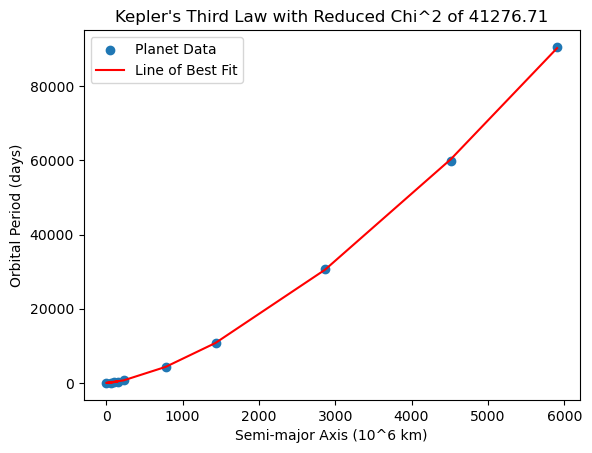

In [13]:
plt.scatter(x=semi_major_data, y=orbital_period_data, label = "Planet Data")
plt.plot(semi_major_data, keplers_third_law(semi_major_data, m_fit), c="red", label="Line of Best Fit")
plt.title(f"Kepler's Third Law with Reduced Chi^2 of {chi2_reduced:.2f}")
plt.xlabel("Semi-major Axis (10^6 km)")
plt.ylabel("Orbital Period (days)")
plt.legend()
plt.show()

In [14]:
df.to_csv("kepler.csv", index = False)